### Bibliotecas

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Extração

In [26]:
df = pd.read_csv('NYNEWYOR.txt', delim_whitespace=True, header=None)

In [27]:
df

,0,1,2,3
0,1,1,1995,44.0
1,1,2,1995,41.8
2,1,3,1995,28.1
3,1,4,1995,31.7
4,1,5,1995,21.3
...,...,...,...,...
9260,5,9,2020,42.2
9261,5,10,2020,50.3
9262,5,11,2020,55.7
9263,5,12,2020,51.1


In [28]:
df.rename(columns={0: 'mês',
                  1: 'dia',
                  2: 'ano',
                  3: 'temperatura'},
         inplace=True)

In [29]:
df

,mês,dia,ano,temperatura
0,1,1,1995,44.0
1,1,2,1995,41.8
2,1,3,1995,28.1
3,1,4,1995,31.7
4,1,5,1995,21.3
...,...,...,...,...
9260,5,9,2020,42.2
9261,5,10,2020,50.3
9262,5,11,2020,55.7
9263,5,12,2020,51.1


### Extração

In [30]:
df.dtypes

mês              int64
dia              int64
ano              int64
temperatura    float64
dtype: object

In [31]:
df.count()

mês            9265
dia            9265
ano            9265
temperatura    9265
dtype: int64

In [32]:
df.temperatura.value_counts()

temperatura
77.5    35
73.8    32
76.3    32
75.0    31
76.4    30
        ..
12.5     1
8.5      1
18.0     1
92.7     1
92.2     1
Name: count, Length: 765, dtype: int64

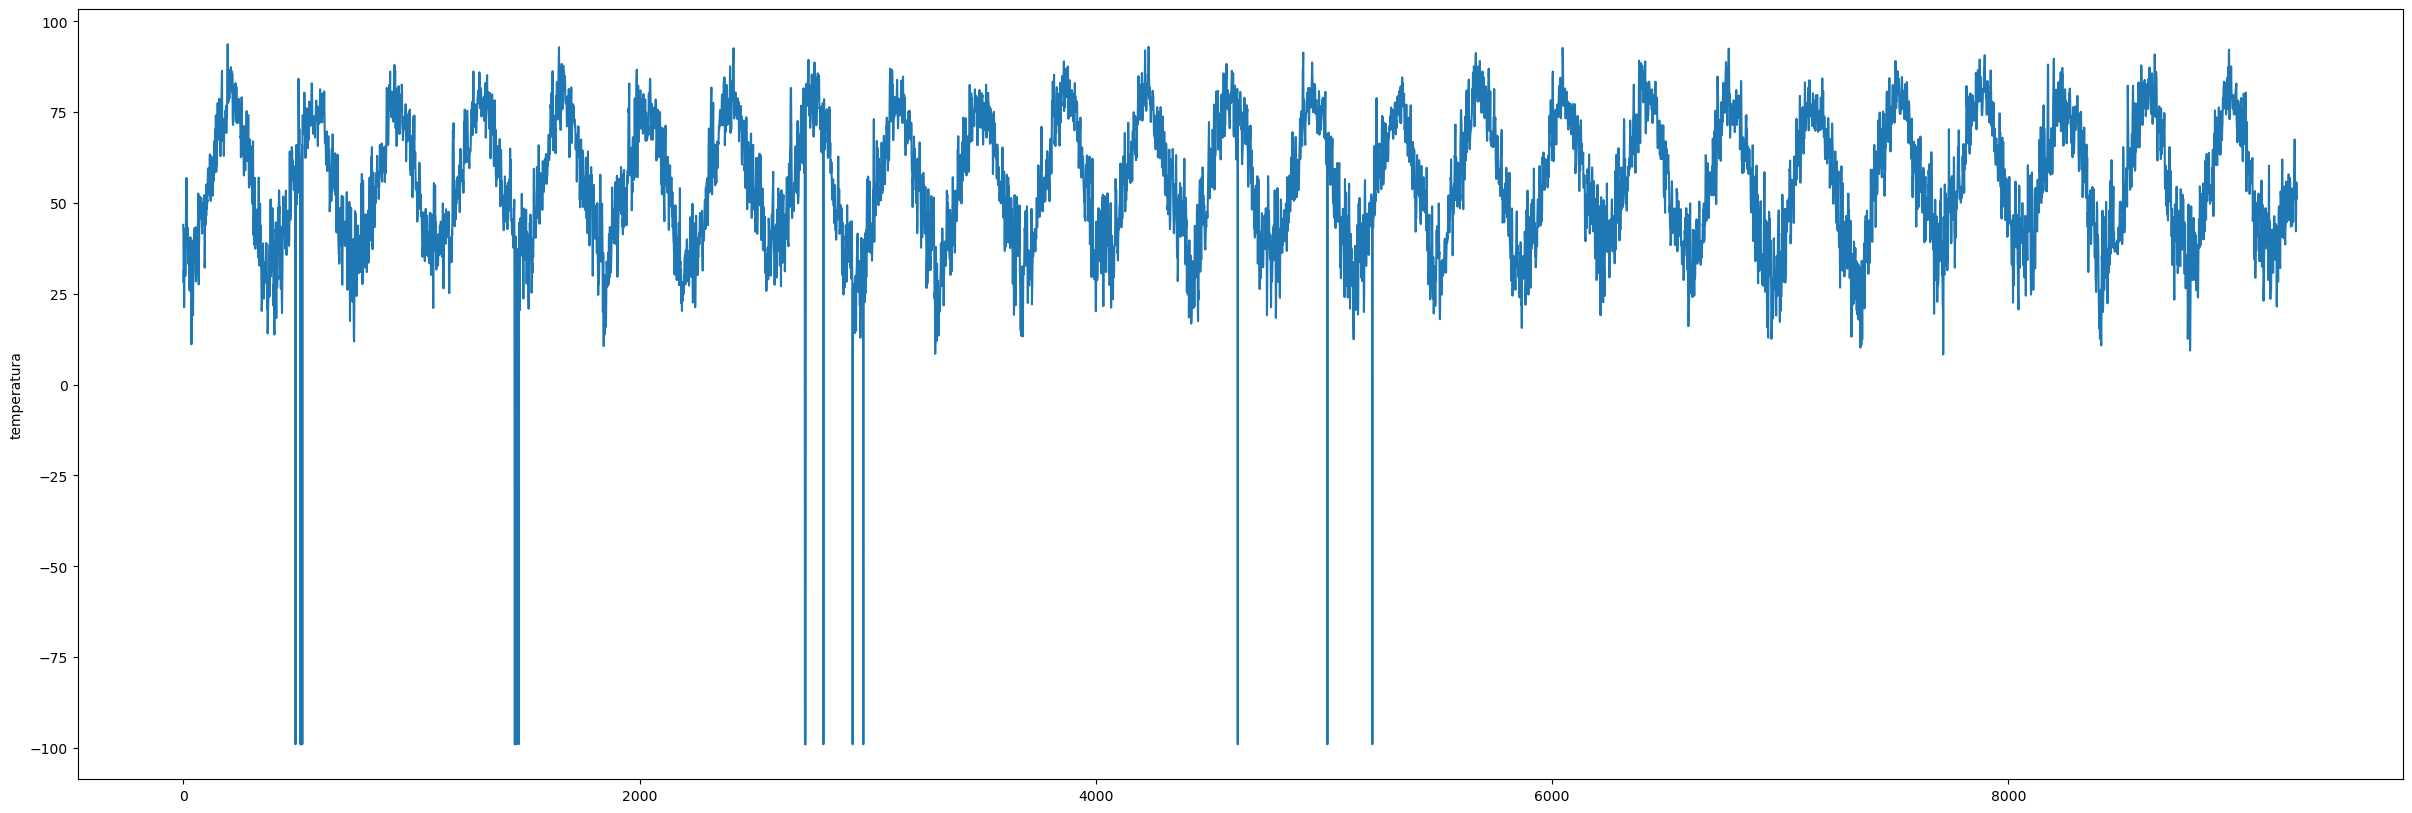

In [35]:
plt.figure(figsize=(30, 10))
sns.lineplot(x=df.index, y=df.temperatura)
plt.show()

In [36]:
df.describe()

,mês,dia,ano,temperatura
count,9265.000000,9265.000000,9265.000000,9265.000000
mean,6.468322,15.715812,2007.187372,55.640615
std,3.457036,8.800739,7.325302,18.501274
min,1.000000,1.000000,1995.000000,-99.000000
25%,3.000000,8.000000,2001.000000,42.200000
50%,6.000000,16.000000,2007.000000,56.000000
75%,9.000000,23.000000,2014.000000,71.300000
max,12.000000,31.000000,2020.000000,93.700000


In [37]:
df.temperatura = df.temperatura.replace(-99, np.nan)

In [38]:
df['elemento_anterior'] = df.temperatura.shift(1)

In [39]:
df['elemento_posterior'] = df.temperatura.shift(-1)

In [40]:
df.head()

,mês,dia,ano,temperatura,elemento_anterior,elemento_posterior
0,1,1,1995,44.0,NaN,41.8
1,1,2,1995,41.8,44.0,28.1
2,1,3,1995,28.1,41.8,31.7
3,1,4,1995,31.7,28.1,21.3
4,1,5,1995,21.3,31.7,27.9


In [41]:
df[df.temperatura.notnull() == False]

,mês,dia,ano,temperatura,elemento_anterior,elemento_posterior
492,5,7,1996,NaN,50.2,48.5
514,5,29,1996,NaN,57.5,57.4
517,6,1,1996,NaN,58.5,NaN
518,6,2,1996,NaN,NaN,59.7
522,6,6,1996,NaN,65.9,69.6
1453,12,24,1998,NaN,24.3,NaN
1454,12,25,1998,NaN,NaN,30.5
1459,12,30,1998,NaN,39.0,NaN
1460,12,31,1998,NaN,NaN,25.9
1470,1,10,1999,NaN,37.5,24.8


In [42]:
df['back_fill'] = df.temperatura.bfill(axis=0)

In [43]:
df['foward_fill'] = df.temperatura.ffill(axis=0)

In [44]:
df.head()

,mês,dia,ano,temperatura,elemento_anterior,elemento_posterior,back_fill,foward_fill
0,1,1,1995,44.0,NaN,41.8,44.0,44.0
1,1,2,1995,41.8,44.0,28.1,41.8,41.8
2,1,3,1995,28.1,41.8,31.7,28.1,28.1
3,1,4,1995,31.7,28.1,21.3,31.7,31.7
4,1,5,1995,21.3,31.7,27.9,21.3,21.3


In [47]:
df['substituição'] = (df.temperatura.shift(1).ffill(axis=0) + df.temperatura.shift(-1).bfill(axis=0))/2

In [48]:
df.head()

,mês,dia,ano,temperatura,elemento_anterior,elemento_posterior,back_fill,foward_fill,substituição
0,1,1,1995,44.0,NaN,41.8,44.0,44.0,NaN
1,1,2,1995,41.8,44.0,28.1,41.8,41.8,36.05
2,1,3,1995,28.1,41.8,31.7,28.1,28.1,36.75
3,1,4,1995,31.7,28.1,21.3,31.7,31.7,24.70
4,1,5,1995,21.3,31.7,27.9,21.3,21.3,29.80


In [51]:
df[df.temperatura.notnull() == False]

,mês,dia,ano,temperatura,elemento_anterior,elemento_posterior,back_fill,foward_fill,substituição
492,5,7,1996,NaN,50.2,48.5,48.5,50.2,49.35
514,5,29,1996,NaN,57.5,57.4,57.4,57.5,57.45
517,6,1,1996,NaN,58.5,NaN,59.7,58.5,59.10
518,6,2,1996,NaN,NaN,59.7,59.7,58.5,59.10
522,6,6,1996,NaN,65.9,69.6,69.6,65.9,67.75
1453,12,24,1998,NaN,24.3,NaN,30.5,24.3,27.40
1454,12,25,1998,NaN,NaN,30.5,30.5,24.3,27.40
1459,12,30,1998,NaN,39.0,NaN,25.9,39.0,32.45
1460,12,31,1998,NaN,NaN,25.9,25.9,39.0,32.45
1470,1,10,1999,NaN,37.5,24.8,24.8,37.5,31.15


In [52]:
df.temperatura = np.where(df.temperatura.notnull() == False,
                          df.substituição,
                          df.temperatura
                         )

In [53]:
df

,mês,dia,ano,temperatura,elemento_anterior,elemento_posterior,back_fill,foward_fill,substituição
0,1,1,1995,44.0,NaN,41.8,44.0,44.0,NaN
1,1,2,1995,41.8,44.0,28.1,41.8,41.8,36.05
2,1,3,1995,28.1,41.8,31.7,28.1,28.1,36.75
3,1,4,1995,31.7,28.1,21.3,31.7,31.7,24.70
4,1,5,1995,21.3,31.7,27.9,21.3,21.3,29.80
...,...,...,...,...,...,...,...,...,...
9260,5,9,2020,42.2,53.1,50.3,42.2,42.2,51.70
9261,5,10,2020,50.3,42.2,55.7,50.3,50.3,48.95
9262,5,11,2020,55.7,50.3,51.1,55.7,55.7,50.70
9263,5,12,2020,51.1,55.7,51.8,51.1,51.1,53.75


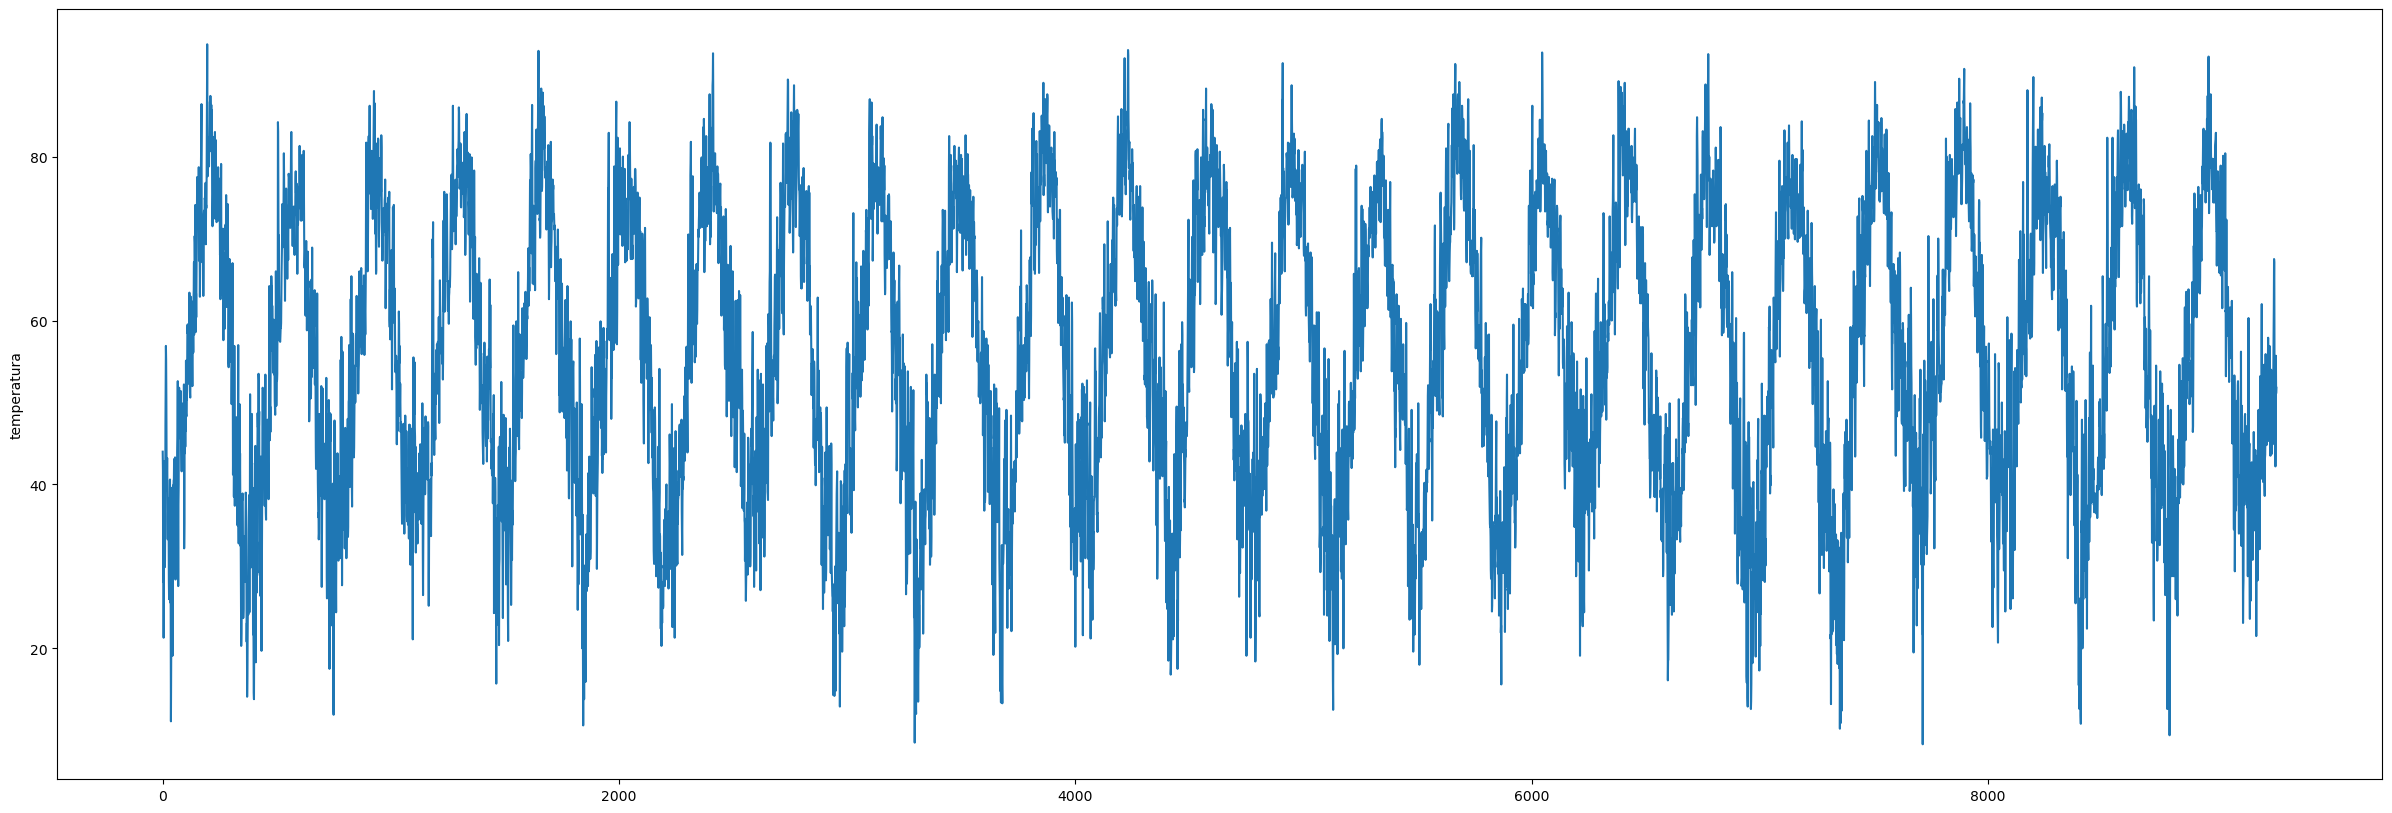

In [54]:
plt.figure(figsize=(30, 10))
sns.lineplot(x=df.index, y=df.temperatura)
plt.show()

In [55]:
df.describe()

,mês,dia,ano,temperatura,elemento_anterior,elemento_posterior,back_fill,foward_fill,substituição
count,9265.000000,9265.000000,9265.000000,9265.000000,9244.000000,9244.000000,9265.000000,9265.000000,9263.000000
mean,6.468322,15.715812,2007.187372,55.968538,55.975606,55.976450,55.969768,55.967307,55.970436
std,3.457036,8.800739,7.325302,17.067751,17.065067,17.064668,17.071775,17.065213,16.596262
min,1.000000,1.000000,1995.000000,8.300000,8.300000,8.300000,8.300000,8.300000,13.750000
25%,3.000000,8.000000,2001.000000,42.200000,42.200000,42.200000,42.200000,42.200000,42.250000
50%,6.000000,16.000000,2007.000000,56.100000,56.100000,56.100000,56.100000,56.100000,56.000000
75%,9.000000,23.000000,2014.000000,71.300000,71.300000,71.300000,71.300000,71.300000,71.300000
max,12.000000,31.000000,2020.000000,93.700000,93.700000,93.700000,93.700000,93.700000,90.650000


In [56]:
df['temperatura_celsius'] = (df.temperatura - 32)*(5/9)

In [57]:
df.describe()

,mês,dia,ano,temperatura,elemento_anterior,elemento_posterior,back_fill,foward_fill,substituição,temperatura_celsius
count,9265.000000,9265.000000,9265.000000,9265.000000,9244.000000,9244.000000,9265.000000,9265.000000,9263.000000,9265.000000
mean,6.468322,15.715812,2007.187372,55.968538,55.975606,55.976450,55.969768,55.967307,55.970436,13.315854
std,3.457036,8.800739,7.325302,17.067751,17.065067,17.064668,17.071775,17.065213,16.596262,9.482084
min,1.000000,1.000000,1995.000000,8.300000,8.300000,8.300000,8.300000,8.300000,13.750000,-13.166667
25%,3.000000,8.000000,2001.000000,42.200000,42.200000,42.200000,42.200000,42.200000,42.250000,5.666667
50%,6.000000,16.000000,2007.000000,56.100000,56.100000,56.100000,56.100000,56.100000,56.000000,13.388889
75%,9.000000,23.000000,2014.000000,71.300000,71.300000,71.300000,71.300000,71.300000,71.300000,21.833333
max,12.000000,31.000000,2020.000000,93.700000,93.700000,93.700000,93.700000,93.700000,90.650000,34.277778
